In numerical linear algebra, matrix norms and condition numbers are foundational concepts that aid in quantifying the behavior of matrices in a variety of computational tasks. Matrix norms quantify the size of a matrix, whereas condition numbers provide information on how much changes in its input affect its output. In order to guarantee numerical stability and accuracy in computer algorithms, matrix norms and condition numbers are essential.


## What are Norms?
Norms are mathematical functions that assign a non-negative value to a matrix, indicating its magnitude or size. Matrix norms measure the "size" or "magnitude" of a matrix, describing how it scales or distorts vectors
###Key matrix norms:
1. **L1 Norm:**
Measures the maximum absolute column sum:
$$ \|A\|_1 = \max_j \sum_i |a_{ij}| $$

2. **L2 Norm (Spectral Norm):**
 Measures the largest singular value (related to eigenvalues):
$$ \|A\|_2 = \sqrt{\lambda_{\max}(A^T A)} $$

3. **Linf Norm:**
 Measures the maximum absolute row sum:
$$ \|A\|_\infty = \max_i \sum_j |a_{ij}| $$

Below is an example demonstrating norms.

Use the sliders to adjust the entries of a $ 2 \times 2 $ matrix $ A $. As each entry is modified, the output will:

- Display the updated matrix
- Compute and show the L1, L2, and L∞ norms of the matrix

This helps build intuition on how different entries affect various matrix norms. For example, increasing off-diagonal terms may impact the L1 and L∞ norms differently than the L2 norm.




In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

def l1_norm(matrix):
    return np.max(np.sum(np.abs(matrix), axis=0))

def l2_norm(matrix):
    return np.sqrt(np.max(np.linalg.eigvals(matrix.T @ matrix).real))

def linf_norm(matrix):
    return np.max(np.sum(np.abs(matrix), axis=1))

def display_matrix_and_norms(matrix):
    output.clear_output(wait=True)
    with output:
        print(f"Matrix:\n{np.array2string(matrix, separator=', ')}\n")
        print(f"L1 Norm: {l1_norm(matrix):.2f}\nL2 Norm: {l2_norm(matrix):.2f}\nL∞ Norm: {linf_norm(matrix):.2f}")

slider_A00 = widgets.FloatSlider(value=1, min=-10, max=10, step=0.1, description="A[0,0]")
slider_A01 = widgets.FloatSlider(value=2, min=-10, max=10, step=0.1, description="A[0,1]")
slider_A10 = widgets.FloatSlider(value=3, min=-10, max=10, step=0.1, description="A[1,0]")
slider_A11 = widgets.FloatSlider(value=4, min=-10, max=10, step=0.1, description="A[1,1]")
output = widgets.Output()

def update_matrix(change):
    display_matrix_and_norms(np.array([[slider_A00.value, slider_A01.value],
                      [slider_A10.value, slider_A11.value]]))

slider_A00.observe(update_matrix, names='value')
slider_A01.observe(update_matrix, names='value')
slider_A10.observe(update_matrix, names='value')
slider_A11.observe(update_matrix, names='value')
display(widgets.VBox([slider_A00, slider_A01, slider_A10, slider_A11]), output)
update_matrix(None)

Output()

## Visualizing Unit Balls for L1, L2, and L∞ Norms

In $ \mathbb{R}^2 $, the unit ball represents all vectors $ x $ such that $ \|x\| = 1 $. The shape of the unit ball depends on the norm:

- **L1 norm**: Forms a diamond shape.
- **L2 norm**: Standard Euclidean circle.
- **L∞ norm**: Forms a square aligned with the axes.

This helps understand the geometric nature of norms and why different norms induce different shapes in space. Norms are used to define distance metrics, and these unit balls reveal what "unit distance" looks like under each norm.


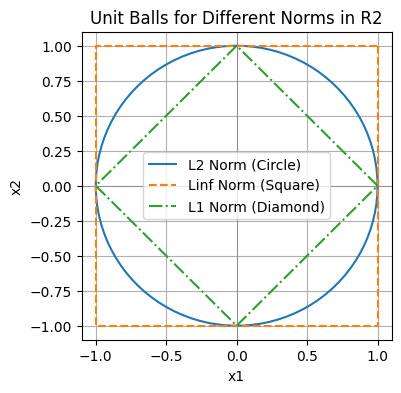

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_unit_balls():
    theta = np.linspace(0, 2 * np.pi, 100)
    unit_circle_l2 = np.array([np.cos(theta), np.sin(theta)])
    unit_square_linf = np.array([[1, 1, -1, -1, 1], [1, -1, -1, 1, 1]])
    unit_diamond_l1 = np.array([[1, 0, -1, 0, 1], [0, 1, 0, -1, 0]])

    plt.figure(figsize=(4, 4))
    plt.plot(unit_circle_l2[0], unit_circle_l2[1], label='L2 Norm (Circle)')
    plt.plot(unit_square_linf[0], unit_square_linf[1], label='Linf Norm (Square)', linestyle='--')
    plt.plot(unit_diamond_l1[0], unit_diamond_l1[1], label='L1 Norm (Diamond)', linestyle='-.')

    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.legend()
    plt.title('Unit Balls for Different Norms in R2')
    plt.grid()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

visualize_unit_balls()


## Condition Number
In solving the linear system \( Ax = b \), the accuracy of the solution \( x \) depends on the properties of the matrix \( A \). A metric to analyze this sensitivity is the **condition number** of \( A \). The condition number evaluates the sensitivity of matrix to small Perturbation (Error)s.
Defined as `cond(A) = ||A|| * ||A^-1||`, a high value implies potential numerical instability. High condition numbers signify that small changes in input can drastically affect results.

A condition number close to 1 indicates that the matrix is well-conditioned and small changes in input will not greatly impact the accuracy of the solution. On the other hand, a condition number significantly larger than 1 suggests that the matrix is ill-conditioned, and even tiny Perturbation (Error)s or error in the matrix elements can lead to large errors in the solution

The following interactive example shows how perturbing \( b \) affects \( x \) for both well-conditioned and ill-conditioned matrices. With even slight adjustments to the input can lead to significant variations in the output, especially when dealing with ill-conditioned matrices. Adjust the slider to see how the condition number amplifies the effect of Perturbation (Error)s.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np

def solve_linear_system(A, b):
    return np.linalg.solve(A, b)

def condition_number(matrix):
    singular_values = np.linalg.svd(matrix, compute_uv=False)
    return singular_values.max() / singular_values.min()

def perturbation_demo():
    def update(change):
        with output:
            clear_output(wait=True)

            perturbation_scale = perturbation_slider.value

            A_ill = np.array([[1, 1], [1, 1.0001]])
            b_ill = np.array([2, 2.0001])
            A_well = np.array([[2, 1], [1, 2]])
            b_well = np.array([3, 4])

            perturbation = np.random.rand(2) * perturbation_scale

            x_ill_original = solve_linear_system(A_ill, b_ill)
            x_ill_perturbed = solve_linear_system(A_ill, b_ill + perturbation)

            x_well_original = solve_linear_system(A_well, b_well)
            x_well_perturbed = solve_linear_system(A_well, b_well + perturbation)

            print("Ill-Conditioned Matrix:")
            print(f"Matrix A:\n{A_ill}")
            print(f"Condition Number: {condition_number(A_ill):.2f}")
            print(f"Original Input b: {b_ill}")
            print(f"Perturbed Input b: {b_ill + perturbation}")
            print(f"Original Solution x: {x_ill_original}")
            print(f"Perturbed Solution x: {x_ill_perturbed}")
            print("-" * 50)

            print("Well-Conditioned Matrix:" )
            print(f"Matrix A:\n{A_well}")
            print(f"Condition Number: {condition_number(A_well):.2f}")
            print(f"Original Input b: {b_well}")
            print(f"Perturbed Input b: {b_well + perturbation}")
            print(f"Original Solution x: {x_well_original}")
            print(f"Perturbed Solution x: {x_well_perturbed}")

    perturbation_slider = widgets.FloatSlider(
        value=0.01, min=0.0, max=0.1, step=0.005,
        description='Perturbation:', continuous_update=True
    )
    output = widgets.Output()

    perturbation_slider.observe(update, names='value')

    display(widgets.VBox([perturbation_slider, output]))
    update(None)

perturbation_demo()


# Spectral Radius

The **spectral radius** of a matrix \( A \) is defined as the largest absolute value of its eigenvalues. Mathematically, it is given by:

$$
\rho(A) = \max \left\{ |\lambda_1|, |\lambda_2|, \dots, |\lambda_n| \right\}
$$

where

$$
(\lambda_1, \lambda_2, \dots, \lambda_n)
$$

are the eigenvalues of matrix \( A \).

The **spectral radius** gives a measure of how much the matrix stretches vectors, giving insights into how the matrix scales vectors in its principal direction.
It plays a key role in analyzing the **stability** of numerical algorithms, as well as in the behavior of a system governed by matrix \( A \). A large spectral radius implies that the matrix will stretch vectors considerably, leading to potential instability in computations. Furthermore, the spectral radius also provide information about the convergence rate of iterative methods used to solve linear systems. By examining the spectral radius of the iteration matrix in methods, one can determine how quickly the method will converge to the solution or the potential for divergence.

In the below example, by varying the entries of the matrix, how the spectral radius interacts with the shape of the transformed unit circle.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

theta = np.linspace(0, 2 * np.pi, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

def spectral_radius(A):
    return np.max(np.abs(np.linalg.eigvals(A)))

def plot_transformed_ellipse_interactive():
    def plot_transformed_ellipse(scale_x=1, scale_y=1):
        A = np.array([[scale_x, 0], [0, scale_y]])

        transformed_points = A @ np.vstack((circle_x, circle_y))
        spec_radius = spectral_radius(A)
        plt.figure(figsize=(8, 8))
        plt.plot(circle_x, circle_y, label='Unit Circle (L2 Norm)', color='blue')
        plt.plot(transformed_points[0], transformed_points[1], label='Transformed Ellipse', color='red')
        plt.title(f'Transformation of Unit Circle by Matrix A (scale_x={scale_x}, scale_y={scale_y})')
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)
        plt.axhline(0, color='black', linewidth=0.5, ls='--')
        plt.axvline(0, color='black', linewidth=0.5, ls='--')
        plt.grid()
        plt.legend()
        plt.figtext(0.15, 0.85, f'Spectral Radius: {spec_radius:.2f}', fontsize=12, ha='left')
        plt.show()

    interact(plot_transformed_ellipse, scale_x=(0.1, 3.0, 0.1), scale_y=(0.1, 3.0, 0.1))
plot_transformed_ellipse_interactive()


interactive(children=(FloatSlider(value=1.0, description='scale_x', max=3.0, min=0.1), FloatSlider(value=1.0, …

#Condition Number and Its Geometrical Interpretation
Using Spectral radius, we can say, the **condition number** provides insight into how much a linear transformation can stretch or compress input vectors.

The condition number can be understood geometrically as the ratio of the longest to the shortest axes of the ellipse formed by transforming the unit sphere. Specifically:

$$
\text{cond}(A) = \frac{\sigma_{\max}}{\sigma_{\min}}
$$

where:
- $ \sigma_{\max} $ is the largest singular value of matrix \( A \),
- $ \sigma_{\min} $ is the smallest singular value of matrix \( A \).

A high condition number indicates that small changes in input can lead to large changes in output (i.e., the system is ill-conditioned), while a low condition number suggests stability (i.e., the system is well-conditioned).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def condition_number(A):
    return np.linalg.cond(A)

def plot_condition_number(A, perturbation, ax, cond_number):
    theta = np.linspace(0, 2 * np.pi, 100)
    circle_x = np.cos(theta)
    circle_y = np.sin(theta)

    perturbed_A = A + np.random.rand(2, 2) * perturbation
    transformed_points = perturbed_A @ np.vstack((circle_x, circle_y))

    ax.plot(circle_x, circle_y, label='Unit Circle (L2 Norm)', color='blue')
    ax.plot(transformed_points[0], transformed_points[1], label='Transformed Ellipse', color='red')

    ax.set_title(f'Cond: {cond_number:.2f}', fontsize=10)
    ax.set_xlabel('X-axis', fontsize=8)
    ax.set_ylabel('Y-axis', fontsize=8)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
    ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
    ax.grid()
    ax.set_aspect('equal', adjustable='box')

def plot_with_perturbation():
    matrices = [
        np.array([[1, 0], [0, 1.01]]),   # Well-conditioned
        np.array([[10, 0], [0.00001, 1]]),   # Ill-conditioned
        np.array([[100, 0], [0.0000000000001, 1]])] # More ill-conditioned
    cond_numbers = [condition_number(A) for A in matrices]


    def update_plots(perturbation):
        fig, axes = plt.subplots(1, len(matrices), figsize=(15, 5))
        for ax in axes:
            ax.clear()

        for i, A in enumerate(matrices):
            plot_condition_number(A, perturbation, axes[i], cond_numbers[i])
        plt.tight_layout()
        plt.show()

    perturbation_slider = widgets.FloatSlider(
        value=0.1,
        min=0.0,
        max=2.0,
        step=0.05,
        description='Perturbation:',
        continuous_update=False
    )

    interact(update_plots, perturbation=perturbation_slider)

plot_with_perturbation()


interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='Perturbation:', max=2.0, st…

## Effect of Matrix Element on Norms and Condition Number
Use the slider, to observe the effects of changing a matrix value on the L1, L2, and L∞ norms, as well as the condition number of the matrix.

In [ ]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

def interactive_matrix_norms():
    def compute_norms(A):
        l1_norm = np.linalg.norm(A, 1)
        l2_norm = np.linalg.norm(A, 2)
        linf_norm = np.linalg.norm(A, np.inf)
        cond_number = np.linalg.cond(A)
        return l1_norm, l2_norm, linf_norm, cond_number

    def update_matrix(value_00, value_01, value_10, value_11):
        A = np.array([[value_00, value_01], [value_10, value_11]])
        l1_norm, l2_norm, linf_norm, cond_number = compute_norms(A)

        print(f"Matrix A:\n{A}")
        print(f"L1 Norm: {l1_norm:.2f}")
        print(f"L2 Norm: {l2_norm:.2f}")
        print(f"L∞ Norm: {linf_norm:.2f}")
        print(f"Condition Number: {cond_number:.2f}")

    slider_00 = widgets.FloatSlider(value=1.0, min=-20, max=20.0, step=0.1, description='A[0,0]:', continuous_update=False)
    slider_01 = widgets.FloatSlider(value=2.0, min=-20, max=20.0, step=0.1, description='A[0,1]:', continuous_update=False)
    slider_10 = widgets.FloatSlider(value=3.0, min=-20, max=20.0, step=0.1, description='A[1,0]:', continuous_update=False)
    slider_11 = widgets.FloatSlider(value=4.0, min=-20, max=20.0, step=0.1, description='A[1,1]:', continuous_update=False)

    interact(update_matrix, value_00=slider_00, value_01=slider_01, value_10=slider_10, value_11=slider_11)

interactive_matrix_norms()


interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='A[0,0]:', max=20.0, min=-20…